In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import os
def perform_fft_and_plot(wav_file:str):
    # Read the WAV file
    sample_rate, audio_data = wavfile.read(wav_file)
    
    # Ensure audio data is mono for simplicity
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]  # Take the first channel
    
    # Perform FFT
    n = len(audio_data)
    fft_result = np.fft.fft(audio_data)
    fft_magnitude = np.abs(fft_result)[:n // 2]  # Take the magnitude and half the spectrum
    frequencies = np.fft.fftfreq(n, 1/sample_rate)[:n // 2]  # Frequencies corresponding to the FFT

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(frequencies, fft_magnitude)
    plt.title(f'FFT of {wav_file}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.xlim(0, sample_rate / 2)  # Plot up to Nyquist frequency
    plt.grid()
    plt.show()



In [3]:

PARENT_PATH = os.path.dirname(os.getcwd())
PREPROCESSED_DATA_PATH = os.path.join(PARENT_PATH, 'Data-Collected','Preprocessed-Data','Audio-Files','2024-9-19-6-44-38.wav')

In [4]:
RAW_DATA_PATH = os.path.join(PARENT_PATH, 'Data-Collected','Raw-Data','Sample-02','2024-10-30-1-31-23.txt')

In [5]:
sample_rate, audio_data = wavfile.read(PREPROCESSED_DATA_PATH)
print(f'Sample rate: {sample_rate} Hz')

Sample rate: 1000 Hz


2947
[4448 3582 2915 ... 1851 2787 2947]


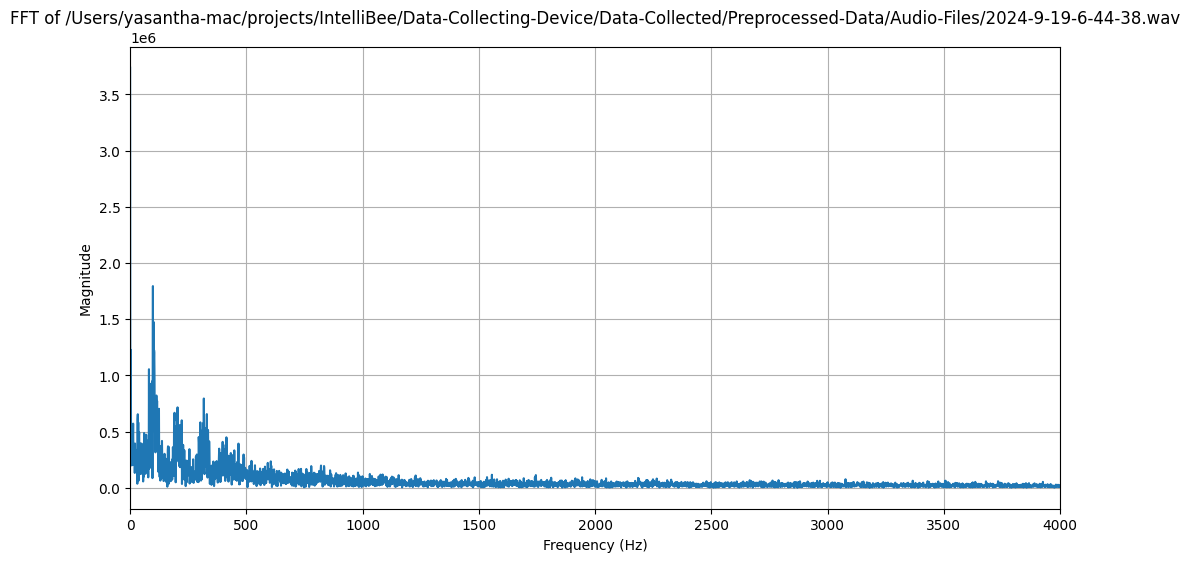

In [6]:
data:None
with open(RAW_DATA_PATH, 'r') as file:
    data = file.read()


data = data.split('\n')[1].strip(",").split(',')
data = data[:8000]
print(data[-1])
numpy_data = np.array(data, dtype=np.int16)
print(numpy_data)

fft_result = np.fft.fft(numpy_data)
sample_rate = 8000
fft_magnitude = np.abs(fft_result)[:len(numpy_data) // 2]  # Take the magnitude and half the spectrum
frequencies = np.fft.fftfreq(len(numpy_data), 1/sample_rate)[:len(numpy_data) // 2]  # Frequencies corresponding to the FFT
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_magnitude)
plt.title(f'FFT of {PREPROCESSED_DATA_PATH}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)  # Plot up to Nyquist frequency
plt.grid()
plt.show()

In [7]:
n = len(audio_data)
fft_result = np.fft.fft(audio_data)
fft_magnitude = np.abs(fft_result)[:n // 2]  # Take the magnitude and half the spectrum
frequencies = np.fft.fftfreq(n, 1/sample_rate)[:n // 2]  # Frequencies corresponding to the FFT


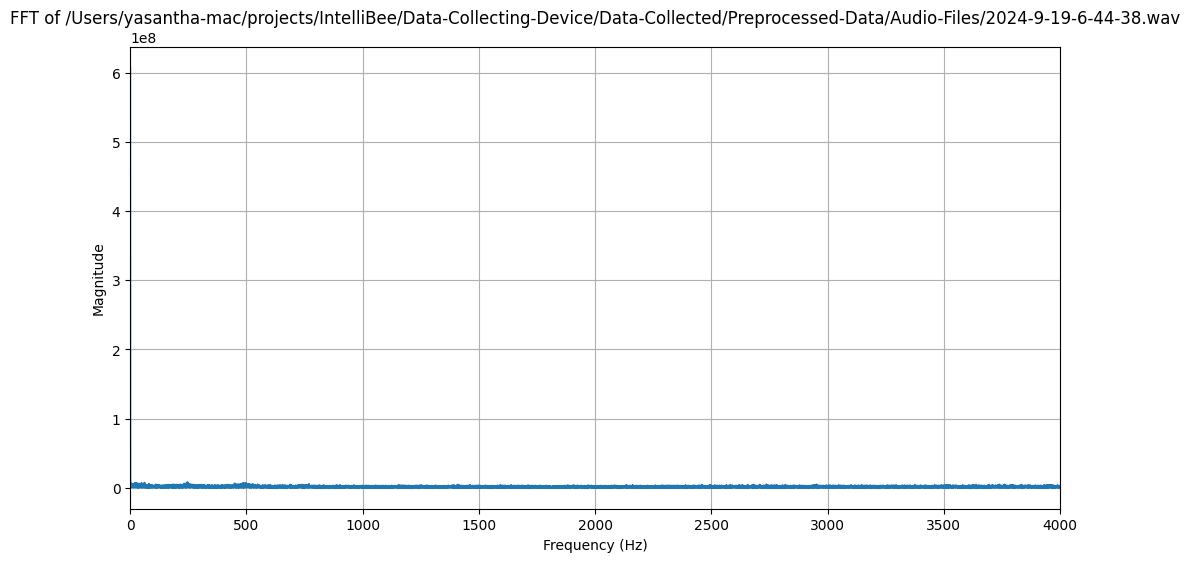

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(frequencies, fft_magnitude)
plt.title(f'FFT of {PREPROCESSED_DATA_PATH}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)  # Plot up to Nyquist frequency
plt.grid()
plt.show()

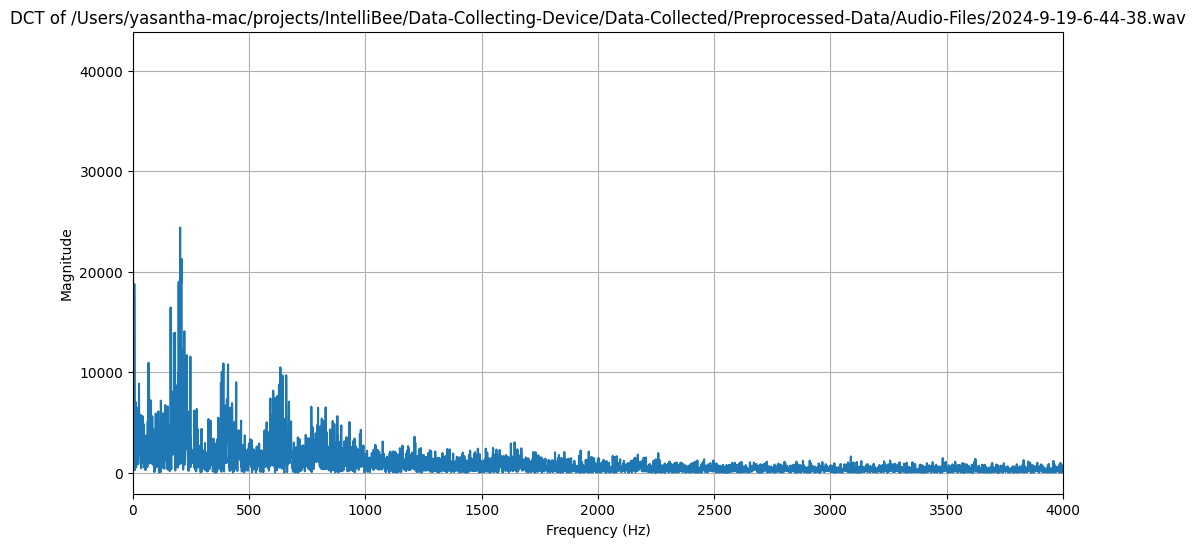

In [9]:
from scipy.fftpack import dct

# Perform DCT
dct_result = dct(numpy_data, norm='ortho')  # Use orthogonal normalization
# Take the magnitude for visualization
dct_magnitude = np.abs(dct_result)

# Create frequency array for plotting
sample_rate = 8000  # Define the sample rate
N = len(numpy_data)
frequencies = np.linspace(0, sample_rate / 2, num=N // 2)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:N//2], dct_magnitude[:N//2])  # Plot only the first half of the DCT result
plt.title(f'DCT of {PREPROCESSED_DATA_PATH}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)  # Plot up to Nyquist frequency
plt.grid()
plt.show()

In [14]:
from scipy.signal import lfilter

# Perform LPC using autocorrelation method
def autocorrelation(x, order):
    """Calculate autocorrelation of a signal."""
    result = np.correlate(x, x, mode='full')
    mid = len(result) // 2
    return result[mid:mid + order + 1]

def lpc_coefficients(signal, order):
    """Calculate LPC coefficients using autocorrelation."""
    r = autocorrelation(signal, order)  # Autocorrelation
    R = np.zeros((order + 1, order + 1))  # Create a matrix for the linear equations
    R[:, 0] = r[:order + 1]

    # Fill the matrix R with the appropriate autocorrelation values
    for i in range(1, order + 1):
        R[i, 1:i + 1] = r[1:i + 1]
    
    # Solve the linear equations
    a = np.linalg.solve(R[1:, 1:], r[1:order + 1])  # Use only the relevant part of R and r
    return a

# Calculate LPC coefficients
lpc_order = 12
lpc_coeffs = lpc_coefficients(numpy_data, lpc_order)
lpc_gain = np.sqrt(np.sum(numpy_data**2) / len(numpy_data))  # Compute gain for normalization
lpc_filter = np.hstack((1, -lpc_coeffs))  # Create filter coefficients
lpc_spectrum = np.abs(np.fft.fft(lpc_filter, N))  # Compute spectrum of the LPC filter

Zero Crossing Rate: 0.1181
Root Mean Square: 12.6529


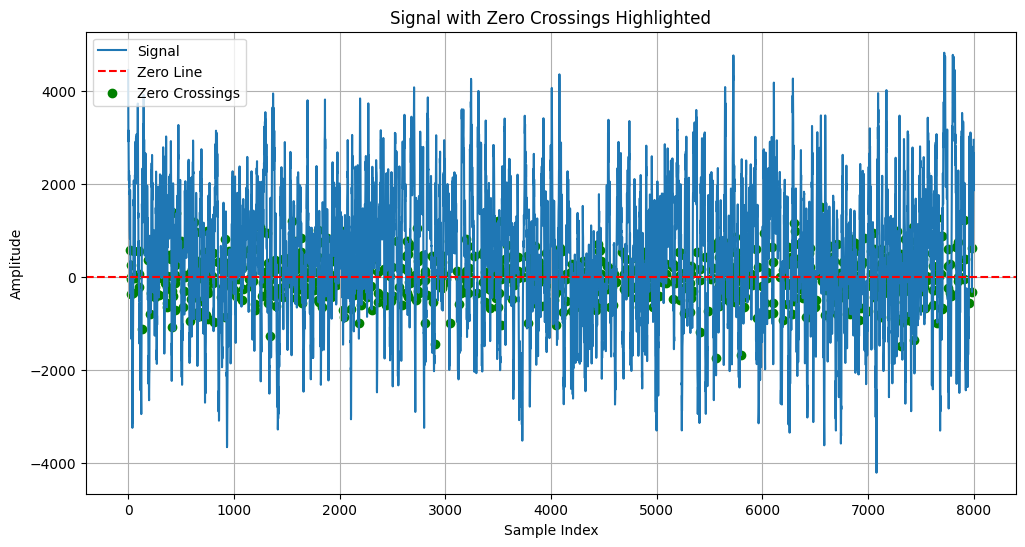

In [19]:
# Function to calculate Zero Crossing Rate
def zero_crossing_rate(signal):
    """Calculate the zero crossing rate of the signal."""
    sign_changes = np.diff(np.sign(signal))
    zcr = np.sum(sign_changes != 0) / len(signal)  # Count non-zero sign changes and normalize
    return zcr

# Function to calculate Root Mean Square (RMS)
def root_mean_square(signal):
    """Calculate the RMS of the signal."""
    rms = np.sqrt(np.mean(signal**2))
    return rms

# Calculate ZCR and RMS
zcr_value = zero_crossing_rate(numpy_data)
rms_value = root_mean_square(numpy_data)

# Print the results
print(f'Zero Crossing Rate: {zcr_value:.4f}')
print(f'Root Mean Square: {rms_value:.4f}')

# Optionally, plot the signal and highlight zero crossings
plt.figure(figsize=(12, 6))
plt.plot(numpy_data, label='Signal')
plt.axhline(0, color='red', linestyle='--', label='Zero Line')
zero_crossings = np.where(np.diff(np.sign(numpy_data)))[0]  # Find zero crossings
plt.scatter(zero_crossings, numpy_data[zero_crossings], color='green', label='Zero Crossings', marker='o')
plt.title('Signal with Zero Crossings Highlighted')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (13,) and (4000,)

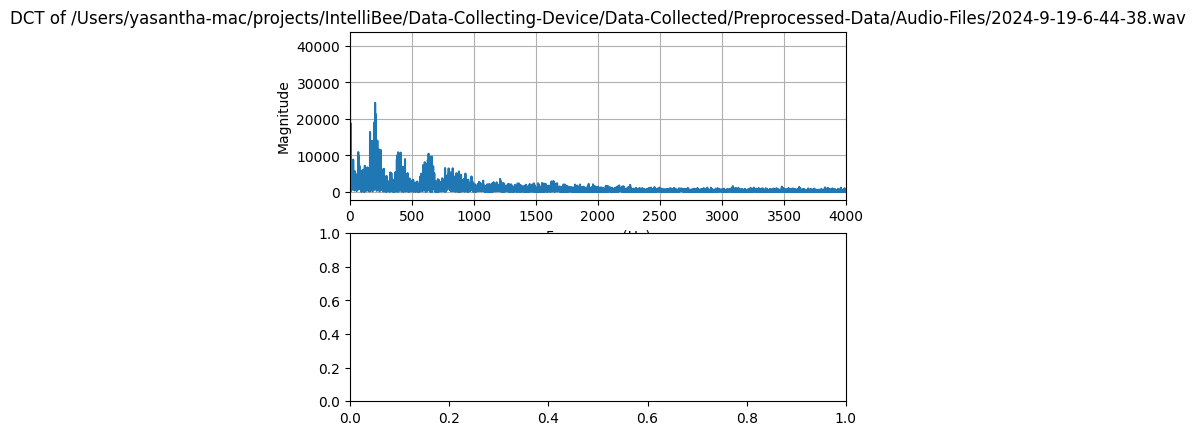

In [15]:
# Plot DCT
plt.subplot(2, 1, 1)
plt.plot(frequencies[:N//2], dct_magnitude[:N//2])
plt.title(f'DCT of {PREPROCESSED_DATA_PATH}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)  # Plot up to Nyquist frequency
plt.grid()

# Plot LPC Spectrum
plt.subplot(2, 1, 2)
lpc_frequencies = np.fft.fftfreq(len(lpc_filter), 1/sample_rate)
plt.plot(lpc_frequencies[:N//2], lpc_spectrum[:N//2] * lpc_gain)  # Normalize by gain
plt.title(f'LPC Spectrum of {PREPROCESSED_DATA_PATH}')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xlim(0, sample_rate / 2)  # Plot up to Nyquist frequency
plt.grid()

plt.tight_layout()
plt.show()